## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [2]:
# lee los datos en un DataFrame

# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
import pandas as pd
data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


For convenience, we'll further process this dataset by shortening the column names:

In [3]:
# que las columnas se llamen 'Total','East', 'West'
data.columns = ['Total', 'East', 'West']

Now let's take a look at the summary statistics for this data:

In [4]:
data.dropna().describe()

,Total,East,West
count,140680.000000,140680.000000,140680.000000
mean,111.245472,50.666001,60.579471
std,142.190544,65.559949,88.412836
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import pandas.util.testing as tm

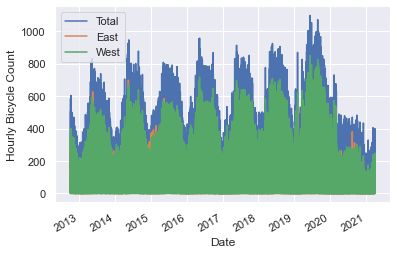

In [7]:
# haz un plot
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by month:

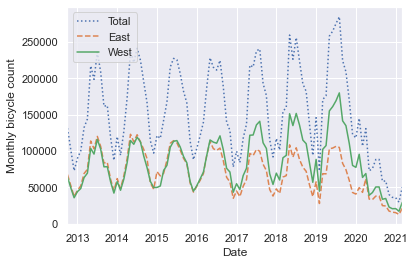

In [8]:
# muestrea por mes y en ese periodo calcula la suma
# pinta ese cálculo con puntos suspensivos para el total, rayado para el este y 
# con línea continua para el oeste

monthly = data.resample('M').sum()
monthly.plot(style=[':', '--', '-'])
plt.ylabel('Monthly bicycle count');


This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) where we explore this further).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

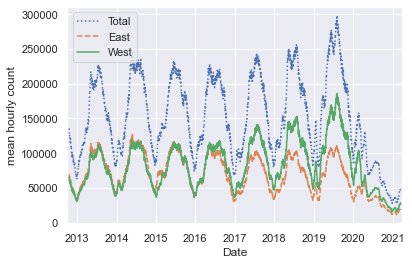

In [9]:
# haz una ventana deslizante de 30 días, calcula la suma y asóciala al centro de la ventana
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

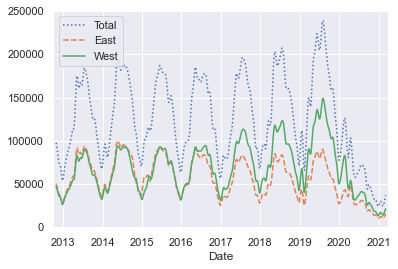

In [10]:
# usa ahora una ventana deslizante gaussiana de 50 días para suavizar más
daily.rolling(50, center = True,
             win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']); 

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

In [13]:
# agrupamos por horas y calculamos la agregación (media) calculada entre todos los días
data.groupby(data.index.time).mean()

,Total,East,West
00:00:00,11.046904,4.674228,6.372676
01:00:00,5.842743,2.612144,3.230599
02:00:00,3.839631,1.840998,1.998632
03:00:00,2.835408,1.459321,1.376087
04:00:00,6.382228,3.368071,3.014157
05:00:00,25.158792,15.285178,9.873614
06:00:00,87.945762,52.584001,35.361760
07:00:00,221.420604,136.864916,84.555688
08:00:00,313.692649,184.043493,129.649156
09:00:00,184.393448,99.512029,84.881420


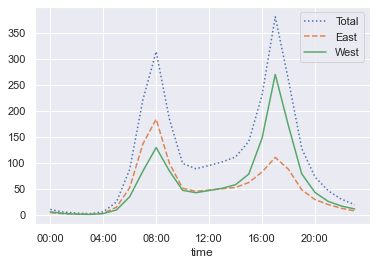

In [14]:
# mirando solo en las horas del día
# investiga qué sucede con el tráfico de bicicletas
import numpy as np
by_time = data.groupby(data.index.time).mean()

hourly_ticks = 4 * 60 * 60 * np.arange(6) # saltos de 4 horas, 6 puntos diferentes
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

In [15]:
data.index.time # son las horas (time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

           Total       East       West
Date                                  
0     129.379381  57.370968  72.008413
1     137.741785  61.346644  76.395140
2     136.894938  61.010273  75.884665
3     130.162092  58.379972  71.782120
4     117.862926  52.813633  65.049293
5      64.404072  32.205745  32.198327
6      62.143718  31.482814  30.660905
            Total       East       West
Mon    129.379381  57.370968  72.008413
Tues   137.741785  61.346644  76.395140
Wed    136.894938  61.010273  75.884665
Thurs  130.162092  58.379972  71.782120
Fri    117.862926  52.813633  65.049293
Sat     64.404072  32.205745  32.198327
Sun     62.143718  31.482814  30.660905


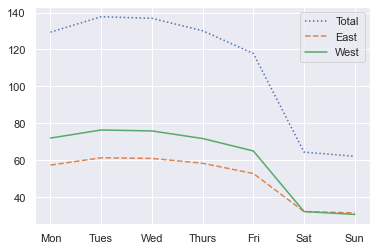

In [16]:
# agrupa ahora por día de la semana y calcula la media
by_weekday = data.groupby(data.index.dayofweek).mean()

print(by_weekday)
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
print(by_weekday)
by_weekday.plot(style=[':', '--', '-'])



This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [17]:
# investiga cómo se comprota el tráfico de biciletas según el día sea fin de semana o no y la hora
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
weekend[70:75]

array(['Weekend', 'Weekend', 'Weekday', 'Weekday', 'Weekday'], dtype='<U7')

In [18]:
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

Total        East        West
Weekday 00:00:00    9.239914    3.958940    5.280974
        01:00:00    4.574600    2.051086    2.523514
        02:00:00    3.049176    1.500597    1.548580
        03:00:00    2.617809    1.365004    1.252805
        04:00:00    7.437097    4.095966    3.341132
        05:00:00   32.291000   19.848890   12.442110
        06:00:00  116.399141   70.458582   45.940559
        07:00:00  297.032943  184.957269  112.075674
        08:00:00  415.273574  245.232514  170.041060
        09:00:00  225.456652  122.360162  103.096489
        10:00:00   98.728445   50.966086   47.762360
        11:00:00   75.932649   39.100072   36.832577
        12:00:00   79.296394   39.702412   39.593981
        13:00:00   85.857961   41.894724   43.963237
        14:00:00   97.490926   44.562560   52.928367
        15:00:00  139.890162   58.278892   81.611270
        16:00:00  269.005492   89.130134  179.875358
        17:00:00  489.102913  133.311127  355.791786
        18:00:00  328.992120  106.273878  222.718243
        19:00:00  156.451051   56.991643   99.459408
        20:00:00   86.383477   34.052531   52.330946
        21:00:00   54.030325   23.215855   30.814470
        22:00:00   34.119150   14.483286   19.635864
        23:00:00   21.312798    8.682187   12.630611
Weekend 00:00:00   15.568698    6.464158    9.104540
        01:00:00    9.016129    4.016129    5.000000
        02:00:00    5.834337    2.700000    3.134337
        03:00:00    3.379928    1.695341    1.684588
        04:00:00    3.742533    1.546595    2.195938
        05:00:00    7.311231    3.864994    3.446237
        06:00:00   16.744325    7.854839    8.889486
        07:00:00   32.209080   16.519116   15.689964
        08:00:00   59.497611   30.924731   28.572879
        09:00:00   81.686380   42.364397   39.321983
        10:00:00  100.318399   53.010753   47.307646
        11:00:00  121.784349   63.025090   58.759259
        12:00:00  135.414576   69.264636   66.149940
        13:00:00  143.216249   72.747909   70.468339
        14:00:00  146.784946   74.490442   72.294504
        15:00:00  144.998805   73.366189   71.632616
        16:00:00  132.709677   66.709677   66.000000
        17:00:00  109.407407   54.434886   54.972521
        18:00:00   83.864994   41.878136   41.986858
        19:00:00   56.543608   27.836320   28.707288
        20:00:00   40.846476   19.262246   21.584229
        21:00:00   28.767025   13.372760   15.394265
        22:00:00   21.557348    9.689964   11.867384
        23:00:00   16.898447    6.982676    9.915771

Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

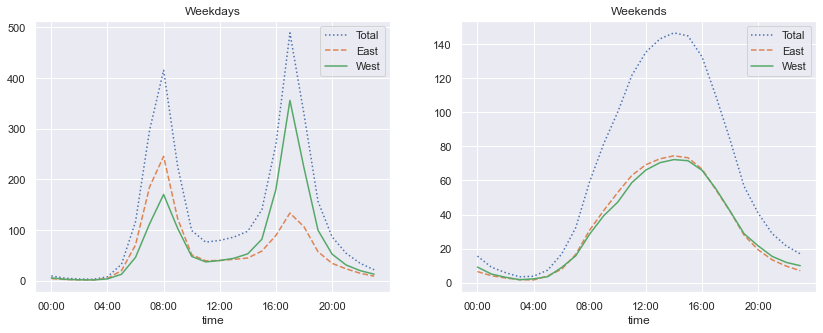

In [19]:
# pinta gráficas para ver el resultado más claro
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks = hourly_ticks, style=[':', '--', '-']);

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.
We will also revisit this dataset in the context of modeling in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).